# Empirical distributions

A figure showing four observations of the empirical distribution, as well as the CDF from which the observations were generated.  From chapter 8.

In [1]:
%matplotlib inline

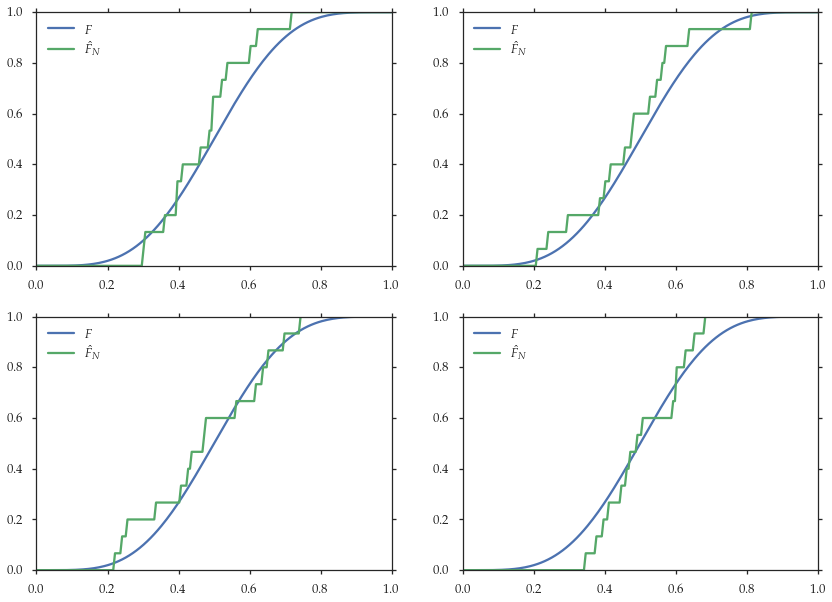

In [6]:

import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rc


sns.set(context='talk')
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})


sample_size = 15 

class ECDF:

    def __init__(self, observations):
        "Parameters: observations is a NumPy array."
        self.observations = observations

    def __call__(self, x): 
        return (self.observations <= x).mean()


q = beta(5, 5)
F = q.cdf
grid = np.linspace(0, 1, num=200)
e = ECDF(None)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    e.observations = q.rvs(sample_size)
    with sns.color_palette("muted"):
        ax.plot(grid, F(grid), label=r"$F$")
        ax.plot(grid, [e(x) for x in grid], label=r"$\hat F_N$")
        ax.legend(loc=2)

plt.show()
